# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ \overrightarrow{w_{new}} = \overrightarrow{w_{old}} - \alpha \left[ \frac{2}{N} \sum_{i = 1}^{i = n} \left[\langle \overrightarrow{w_{old}}, \overrightarrow{x_{i}} \rangle - y_{i} \right] \overrightarrow{x_{i}}  + \frac{2}{C} \overrightarrow{w_{old}} \right] $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
        $$ \nabla_{w} L(w) =   \frac{\partial}{\partial \overrightarrow{w}} \left[ \frac{1}{n}\left[\sum_{i = 1}^{i = n} (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) \right] =
        \frac{\partial}{\partial \overrightarrow{w}} \left[ \frac{1}{n}\left[\sum_{i = 1}^{i = n} (y_i - \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle)) ^ 2 \right] + \frac{1}{C}R(w) \right] = $$
        $$ = \frac{2}{n} \sum_{i = 1}^{i = n} \left[y_i - \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle \right] \frac{\partial}{\partial \overrightarrow{w}}( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) + \frac{1}{C} \frac{\partial}{\partial \overrightarrow{w}}\overrightarrow{w}^{T} \overrightarrow{w} = $$
        $$ = -\frac{2}{n} \sum_{i = 1}^{i = n} \left[y_i - \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle \right] \overrightarrow{x_{i}}  + \frac{1}{C} \frac{\partial}{\partial \overrightarrow{w}} \sum_{i = 1}^{i = D} w_{i}^{2} =  -\frac{2}{n} \sum_{i = 1}^{i = n} \left[y_i - \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle \right] \overrightarrow{x_{i}}  + \frac{2}{C} \overrightarrow{w} $$

Градиент показывает направление наибольшего роста функции. В нашем случае, рассматривая его со знаком минус перед функционалом потерь мы идем вдоль направления наискорейшего убывания

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ \overrightarrow{w_{new}} = \overrightarrow{w_{old}} - \alpha \left[ \frac{1}{n}\sum_{i = 1} ^ {i = n} \left[ \sigma( \langle \overrightarrow{w_{old}}, \overrightarrow{x_{i}} \rangle) - y_{i} \right] \overrightarrow{x_{i}} + \frac{2}{C} \overrightarrow{w_{old}} \right] $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
***Ваше решение здесь***
        $$ \nabla_{w} L(\overrightarrow{w})= \frac{\partial}{\partial \overrightarrow{w}} 
         \left[ \frac{-1}{N}\sum_{n = 1} ^ {n = N}[ y_{i} \log(\sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle)) 
         + (1 - y_{i}) \log(1 - \sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle))] + \frac{1}{C}R(w) \right] = $$       
         $$= -\frac{1}{N}\sum_{n = 1} ^ {n = N} 
         \left[ \frac{y_{i}}{\sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle)} - 
         \frac{1 - y_{i}}{{1 - \sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle)}} \right] *
         \frac{\partial \sigma}{\partial \overrightarrow{w}}( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) + \frac{\partial}{\partial \overrightarrow{w}} \frac{1}{C}\overrightarrow{w}^{T} \overrightarrow{w}= $$
         $$= \left \{
                 \frac{\partial}{\partial z} \sigma(z) = \frac{\partial}{\partial z} \left( \frac{1} {1 + e^{-z}}                      \right) =  \left( \frac{1} {1 + e^{-z}}\right)^2  e^{-z} = \frac {1} {1 + e^{-z}} \frac {e^{-z}} {1 + e^{-z}} = \frac{1}{1 + e^{-z}} \left( 1 - \frac{1}{1 + e^{-z}} \right) = \sigma(z) (1 - \sigma(z)) \right \} = $$
   $$ = -\frac{1}{N}\sum_{n = 1} ^ {n = N}
   \left[ y_{i} (1 - \sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) - (1 - y_{i})\sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) \right] \frac{\partial }{\partial \overrightarrow{w}} \overrightarrow{w}^{T}\overrightarrow{x_{i}} + \frac{2}{C}\overrightarrow{w} = $$
   $$ = -\frac{1}{N}\sum_{n = 1} ^ {n = N} \left[ y_{i} (1 - \sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) - (1 - y_{i})\sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) \right] \overrightarrow{x_{i}} + \frac{2}{C} \overrightarrow{w} = $$
   $$ = \frac{1}{N}\sum_{n = 1} ^ {n = N} \left[ \sigma( \langle \overrightarrow{w}, \overrightarrow{x_{i}} \rangle) - y_{i} \right] \overrightarrow{x_{i}} + \frac{2}{C} \overrightarrow{w}
         $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
$$
\text{Почему это действительно точка минимума?}\\
1) \hspace{0.3cm} Hess(Q) = \left\{ \frac{\partial{Q}^2}{\partial{w_{i}} \partial{w_{j}}} \right\} \\
2) \hspace{0.3cm} \nabla_{w} Q(w) = 2 X^{T}X \overrightarrow{w} - 2X^{T} \overrightarrow{y} \\
\nabla_{w} Q(w)_{i} = (2 X^{T}X \overrightarrow{w} - 2X^{T} \overrightarrow{y})_{i} = \langle 2 (X^{T}X)_{i}, \overrightarrow{w} \rangle - \langle 2 (X^{T})_{i}, \overrightarrow{y} \rangle \\
\frac{\partial{Q}^2}{\partial{w_{i}} \partial{w_{j}}} = 2 (X^{T} X)_{i} \\
\Rightarrow Hess(Q) = 2 X^{T} X \\
3) \hspace{0.3cm} rang(X) = D \Rightarrow Ker(X) = \left\{ \overrightarrow{0} \right\} \Rightarrow  X^{T} X > 0, т.к. \overrightarrow{v}^{T} AA^{T}\overrightarrow{v}=(A^{T}\overrightarrow{v})^T(A^{T}\overrightarrow{v}) > 0 \Rightarrow \\
\Rightarrow Hess(Q) > 0 \Rightarrow \overrightarrow{w} = (X^TX)^{-1}X^T \overrightarrow{y} \text{ является точкой минимума.}
$$

$$ \text{Точное решение для модели с L2-регуляризацией: (из лекций)} \\
\overrightarrow{w} = \left( X^{T}X + \frac{1}{C}I\overrightarrow{w} \right)^{-1} X^{T} \overrightarrow{y}
$$

$L2$-регуляризация устраняет линейную зависимость столбцов в матрице $X^T X$, т.е. делает нашу матрицу хорошо обусловленной

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$
\frac{\partial{E}} {\partial{a}} (L | x_i) = \frac{\partial}{\partial{a}} \left[ -p(y_i = 1 |x_i) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i)) \right] = \\
= \frac{-p(y_i = 1 |x_i)}{a(x_{i})} + \frac{p(y_i = 0 | x_i)}{1 - a(x_{i})} = \\
= \frac{p(y_i = 0 | x_i) a(x_{i}) - p(y_i = 1 |x_i)(1 - a(x_{i}))} {a(x_{i}) (1 - a(x_{i}))} = \\
= \frac{a(x_{i})(p(y_i = 0 | x_i) + p(y_i = 1 | x_i)) - p(y_{i} = 1 | x_{i}) }{a(x_{i}) (1 - a(x_{i}))} = \\
= \frac{a(x_{i}) - p(y_{i} = 1 | x_{i})} {a(x_{i}) (1 - a(x_{i}))} \Rightarrow \text{ Равенство производной нулю достигается при } a = p(y_{i} = 1 | x_{i})
$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
Смысл регуляризации заключается в том, чтобы настроить веса значащих признаков нашей модели для того, чтобы бороться с переобучением, а $ w_{0} $ отвечает за псевдопризнак $f_{0} = 1$, который одинаков у всех объектов выборки. При построении модели в обучающей выборке обнаруживаются некоторые случайные закономерности, которые отсутствуют в генеральной совокупности, но они не будут связаны с признаком $ f_{0} = 1 $ $\Rightarrow$ на соответствующем ему весе не может возникнуть переобучения и регуляризовывать его не нужно.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = sklearn.utils.shuffle(X, y, random_state=0)
    num_batches = X.shape[0] // batch_size
    for i in range(num_batches):
        X_batch = X[batch_size * i : batch_size * (i + 1)]
        y_batch = y[batch_size * i : batch_size * (i + 1)]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    return 1 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        batch_size - размер батча
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size=batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        a = np.array(np.dot(X_batch, self.weights), dtype=np.float64)
        regularization = (1 / self.C) * np.sum(self.weights[1:] ** 2)
        
        if self.model_type == 'lin_reg':
            loss = np.mean((y_batch - a) ** 2) + regularization
        if self.model_type == 'log_reg':
            loss = -np.mean(y_batch * np.log(sigmoid(a))) +
            (1 - y_batch) * np.log(1 - sigmoid(a)) + regularization
        return loss
        
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = np.dot(X_batch, self.weights)
        regularization = (2 / self.C) * self.weights
        regularization[0] = 0
        
        if self.model_type == 'lin_reg':
            loss_grad = 2 * np.mean((a - y_batch).reshape(-1, 1) * X_batch, axis=0) + regularization
        if self.model_type == 'log_reg':
            loss_grad = np.mean((sigmoid(a) - y_batch).reshape(-1, 1) * X_batch, axis=0) + regularization
        return loss_grad
   
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        return self

    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        self.weights = np.array(np.random.rand(X.shape[1] + 1), dtype=np.float64)
        X_fict = np.hstack((np.ones((X.shape[0], 1)), X))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_fict, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X, threshold=0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        threshold - порог
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X_fict = np.hstack((np.ones((X.shape[0], 1)), X))
        
        if self.model_type == 'lin_reg':
            a = np.dot(X, self.weights[1:])
            return a > 0
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_fict, self.weights))
            return np.array(a >= threshold, dtype=int)
        

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    x = range(-5, 5)
    plt.plot(x, -(clf.weights[0] + clf.weights[1] * x) / clf.weights[2])
    print(clf.weights[1], clf.weights[2])

0.15705407370171376 -0.09381777930319261


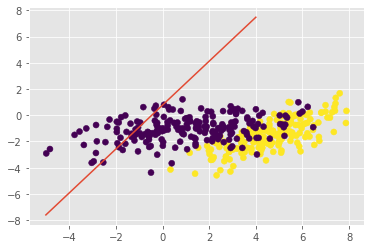

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.01, C=1)
my_clf.fit(X, y)
plot_decision_boundary(my_clf)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

0.2754558725050566 -0.07223379378486947


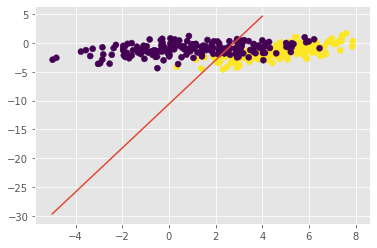

In [10]:
my_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.01, C=1)
my_clf.fit(X, y)
plot_decision_boundary(my_clf)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

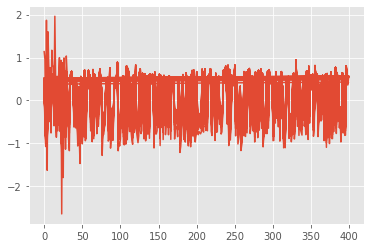

In [11]:
plt.plot(my_clf.errors_log['iter'], my_clf.errors_log['loss'], label='log')

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [258]:
from sklearn.datasets import make_classification

In [259]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

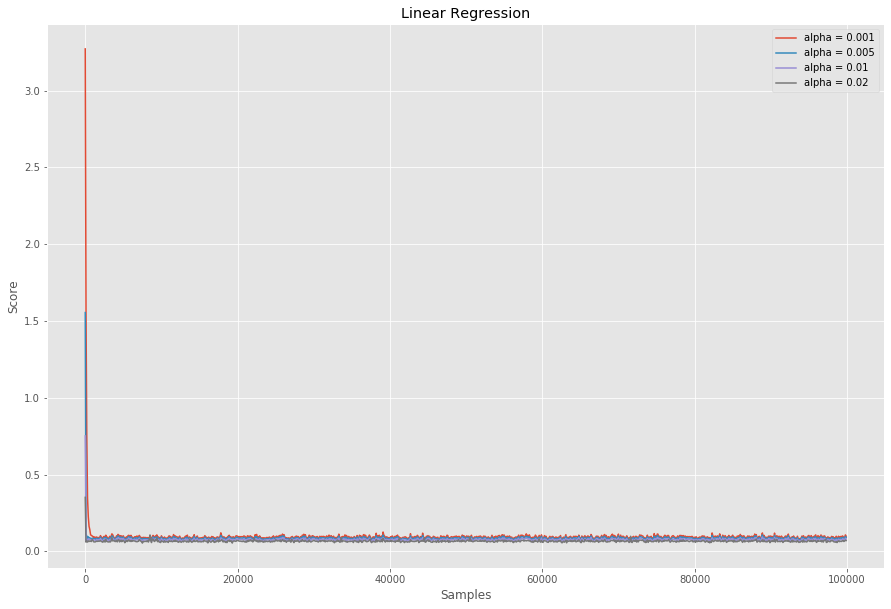

In [42]:
from tqdm import tqdm_notebook

alpha = [0.001, 0.005, 0.01, 0.02]
N = 100
plots = {'x': [], 'y': []}
plt.figure(figsize=(15, 10))
for a in tqdm_notebook(alpha):
    my_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=a, C=1)
    my_clf.fit(X, y)
    x_pl = range(0, X.shape[0], N)
    y_pl = np.array([np.array(my_clf.errors_log['loss'][ind : ind + N]).mean() for ind in range(0, X.shape[0], N)])
    plots['x'].append(x_pl)
    plots['y'].append(y_pl)
for i, a in enumerate(alpha):
    lbl = 'alpha = {}'.format(a)
    plt.plot(plots['x'][i], plots['y'][i], label = lbl)
plt.xlabel('Samples')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.legend()
plt.show()

Увеличим, отбросив первые 10 значений

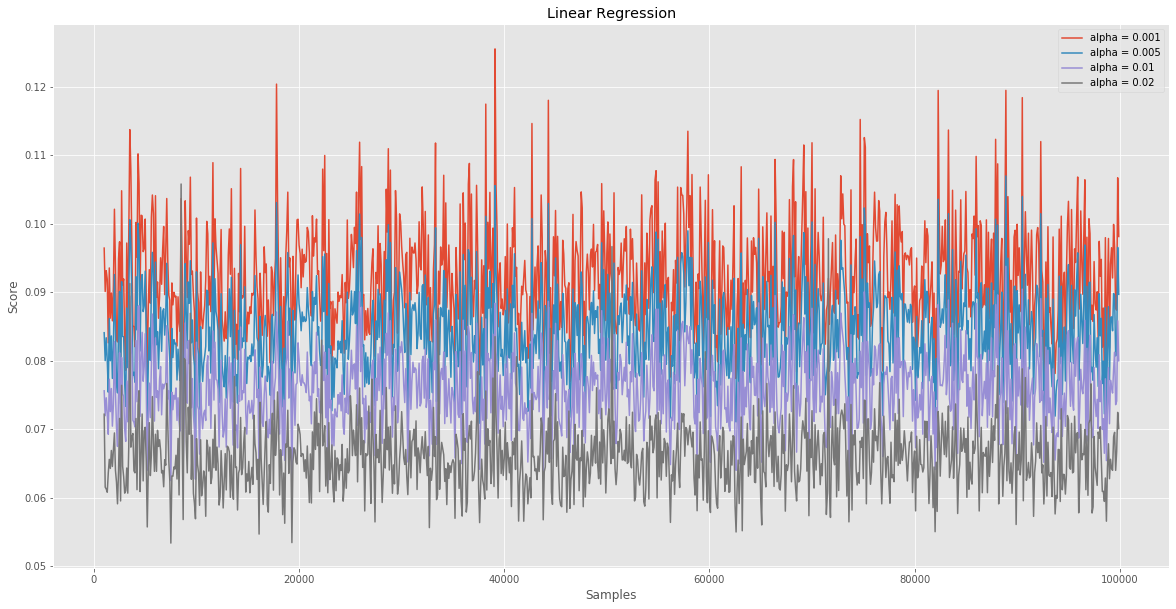

In [44]:
plt.figure(figsize=(20, 10))
for i, a in enumerate(alpha):
    lbl = 'alpha = {}'.format(a)
    plt.plot(plots['x'][i][10:], plots['y'][i][10:], label = lbl)
plt.xlabel('Samples')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.legend()
plt.show()

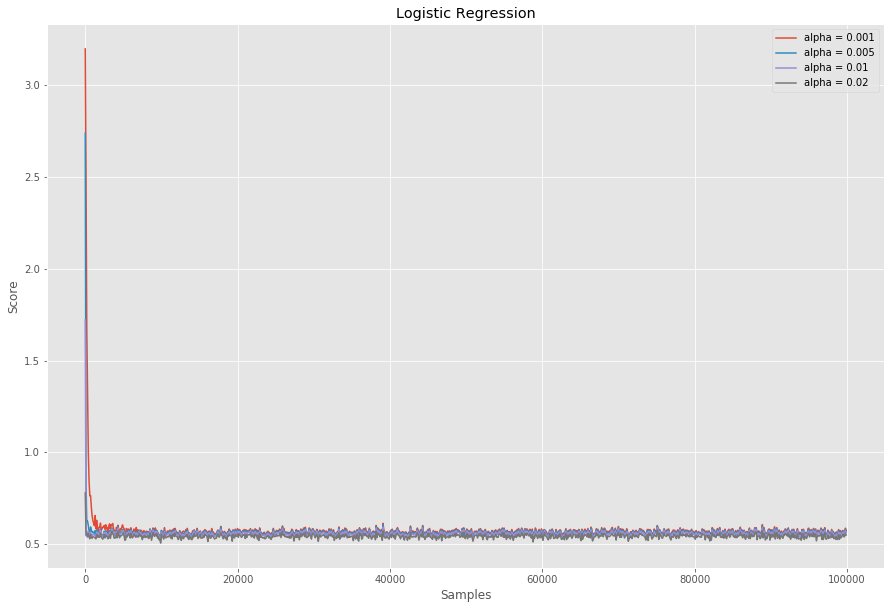

In [46]:
from tqdm import tqdm_notebook

alpha = [0.001, 0.005, 0.01, 0.02]
N = 100
plots = {'x': [], 'y': []}
plt.figure(figsize=(15, 10))
for a in tqdm_notebook(alpha):
    my_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=a, C=1)
    my_clf.fit(X, y)
    x_pl = range(0, X.shape[0], N)
    y_pl = np.array([np.array(my_clf.errors_log['loss'][ind : ind + N]).mean() 
                     for ind in range(0, X.shape[0], N)])
    plots['x'].append(x_pl)
    plots['y'].append(y_pl)
for i, a in enumerate(alpha):
    lbl = 'alpha = {}'.format(a)
    plt.plot(plots['x'][i], plots['y'][i], label = lbl)
plt.xlabel('Samples')
plt.ylabel('Score')
plt.title('Logistic Regression')
plt.legend()
plt.show()

Аналогично, отбросим первые 10 значений

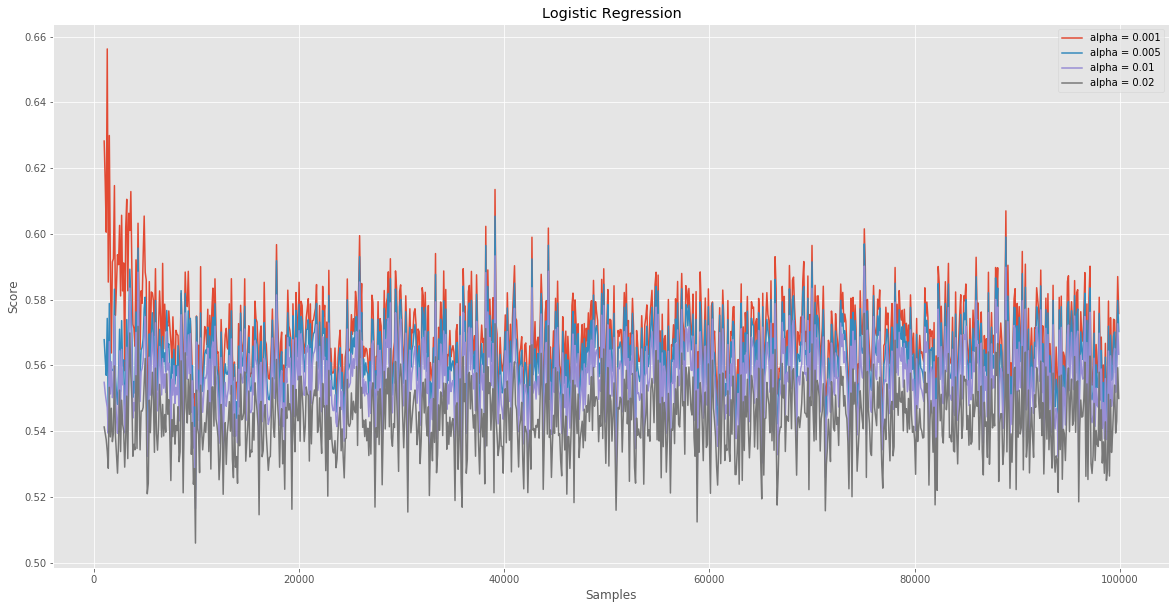

In [47]:
plt.figure(figsize=(20, 10))
for i, a in enumerate(alpha):
    lbl = 'alpha = {}'.format(a)
    plt.plot(plots['x'][i][10:], plots['y'][i][10:], label = lbl)
plt.xlabel('Samples')
plt.ylabel('Score')
plt.title('Logistic Regression')
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

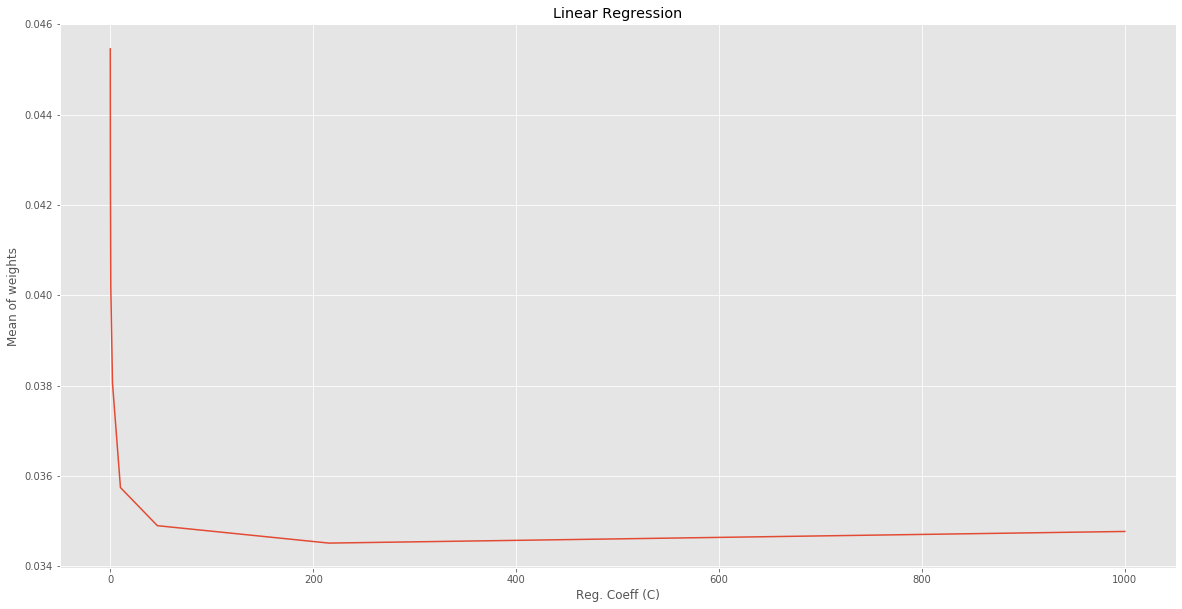

In [235]:
## Your Code Here
reg_coeffs = np.logspace(3, -3, 10)

from tqdm import tqdm_notebook
plt.figure(figsize=(20, 10))
y_pl = []
for coeff in tqdm_notebook(reg_coeffs):
    my_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.00001, C=coeff)
    my_clf.fit(X, y)
    x_pl = reg_coeffs
    y_pl.append(np.mean(my_clf.weights))
plt.plot(x_pl, y_pl)
plt.xlabel('Reg. Coeff (C)')
plt.ylabel('Mean of weights')
plt.title('Linear Regression')
plt.show()

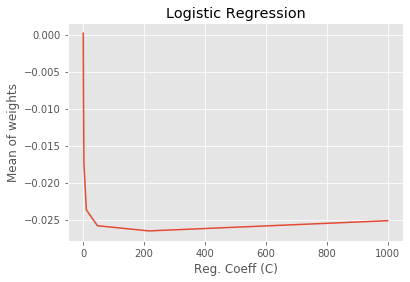

In [260]:
## Your Code Here
reg_coeffs = np.logspace(3, -3, 10)

from tqdm import tqdm_notebook
y_pl = []
for coeff in tqdm_notebook(reg_coeffs):
    my_clf = MySGDClassifier(batch_generator, model_type='log_reg',
                             alpha=0.0001, C=coeff)
    my_clf.fit(X, y)
    x_pl = reg_coeffs
    y_pl.append(np.mean(my_clf.weights))
plt.plot(x_pl, y_pl)
plt.xlabel('Reg. Coeff (C)')
plt.ylabel('Mean of weights')
plt.title('Logistic Regression')
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Да, неплохо вышло

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [14]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [15]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [16]:
len(traingroups_titledata[doc_group])

91

In [17]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [18]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)

In [26]:
import functools
from tqdm import tqdm

scores = []
for size in tqdm(range(1, 20)):
    my_clf = MySGDClassifier(batch_generator=batch_generator, C=1, alpha=0.01, 
                             max_epoch=10, model_type='lin_reg', batch_size=size)
    my_clf.fit(X_train_scaled, y_train)
    y_pred = np.round(my_clf.predict(X_train_scaled))
    scores.append(f1_score(y_train, y_pred))
print(scores)
print(np.max(scores))

100%|██████████| 19/19 [00:21<00:00,  1.14s/it]

[0.6164136866478004, 0.18243561928119992, 0.6165997669299494, 0.6146467919637071, 0.6094117647058822, 0.6155837432047631, 0.6131782945736435, 0.6155239327296248, 0.6151460325665545, 0.6155241674225737, 0.6151460325665545, 0.6154044972861205, 0.6152654010073615, 0.6150459665932927, 0.6152654010073615, 0.6147880041365047, 0.614448472294148, 0.6148081147435068, 0.6152654010073615]
0.6165997669299494


In [27]:
from tqdm import tqdm

scores = []
for size in tqdm(range(1, 20)):
    my_clf = MySGDClassifier(batch_generator=batch_generator, C=1, alpha=0.01, 
                             max_epoch=10, model_type='log_reg', batch_size=size)
    my_clf.fit(X_train_scaled, y_train)
    y_pred = my_clf.predict(X_train)
    scores.append(f1_score(y_train, y_pred))
print(scores)
print(np.max(scores))

100%|██████████| 19/19 [00:20<00:00,  1.06s/it]

[0.6120548634704921, 0.6024395753331827, 0.5859277708592778, 0.5883711167086482, 0.6005123064929279, 0.5954678521088583, 0.6026871401151631, 0.5995367817359656, 0.5996033494931687, 0.6022187004754358, 0.6005123064929279, 0.6025047952160668, 0.6005123064929279, 0.6035963807124041, 0.6000668970899766, 0.6023960216998191, 0.6020823902218199, 0.602238046795524, 0.602461330021452]
0.6120548634704921


Хоть максимум и при батче размера 1, в целях повышения быстродействия выберем размер батча 20, т.к. его score уступает не сильно 

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [33]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

alphas = np.arange(0.001, 0.01, 0.002)
reg_coeffs = np.arange(10, 200 + 1, 20)
epochs = np.arange(10, 100 + 1, 10)

optimal_params = (0.001, 1, 10)
max_score = 0

for alpha in tqdm(alphas):
    for C in reg_coeffs:
        for epoch in epochs:
            scores = []
            for train_index, test_index in skf.split(X_train_scaled, y_train):
                X_tr, X_tt = X_train_scaled[train_index], X_train_scaled[test_index]
                y_tr, y_tt = y_train[train_index], y_train[test_index]
                my_clf = MySGDClassifier(batch_generator=batch_generator, C=C, alpha=alpha, 
                             max_epoch=epoch, model_type='lin_reg', batch_size=20)
                my_clf.fit(X_tr, y_tr)
                y_pred = my_clf.predict(X_tt)
                scores.append(f1_score(y_tt, y_pred))
            validation_score = np.mean(scores)
            if validation_score > max_score:
                max_score = validation_score
                optimal_params = (alpha, C, epoch)
print('Linear regression: optimal params: ', optimal_params, ', optimal score: ', max_score)



100%|██████████| 5/5 [33:36<00:00, 403.35s/it]

Linear regression: optimal params:  (0.009000000000000001, 70, 30) , optimal score:  0.6207639903908322


In [34]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

alphas = np.arange(0.001, 0.01, 0.002)
reg_coeffs = np.arange(10, 200 + 1, 20)
epochs = np.arange(10, 100 + 1, 10)

optimal_params = (0.001, 1, 10)
max_score = 0

for alpha in tqdm(alphas):
    for C in reg_coeffs:
        for epoch in epochs:
            scores = []
            for train_index, test_index in skf.split(X_train_scaled, y_train):
                X_tr, X_tt = X_train_scaled[train_index], X_train_scaled[test_index]
                y_tr, y_tt = y_train[train_index], y_train[test_index]
                my_clf = MySGDClassifier(batch_generator=batch_generator, C=C, alpha=alpha, 
                             max_epoch=epoch, model_type='log_reg', batch_size=20)
                my_clf.fit(X_tr, y_tr)
                y_pred = my_clf.predict(X_tt)
                scores.append(f1_score(y_tt, y_pred))
            validation_score = np.mean(scores)
            if validation_score > max_score:
                max_score = validation_score
                optimal_params = (alpha, C, epoch)
print('Logistic regression: optimal params: ', optimal_params, ', optimal score: ', max_score)



100%|██████████| 5/5 [28:58<00:00, 347.79s/it]

Logistic regression: optimal params:  (0.001, 150, 10) , optimal score:  0.6207222973947412


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [50]:
my_clf = MySGDClassifier(batch_generator=batch_generator, C=150, alpha=0.001, 
                             max_epoch=10, model_type='log_reg', batch_size=20)
my_clf.fit(X_train_scaled, y_train)

scores_thr = []
for threshold in np.linspace(0, 1):
    y_pred = my_clf.predict(X_train_scaled, threshold=threshold)
    scores_thr.append(f1_score(y_train, np.array(y_pred, dtype=int)))
print('Max score: ', np.max(scores_thr))
print('Optimal threshold: ', np.linspace(0, 1)[np.argmax(scores_thr)])

Max score:  0.6191699337569284
Optimal threshold:  0.3877551020408163


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [51]:
test_data = pd.read_csv('test_groups.csv')

In [52]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [53]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [54]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
y_test_pred = np.array(my_clf.predict(X_test_scaled, 0.4), dtype=int)
y_test_pred.shape

(16627,)

In [56]:
ans_data = {'pair_id': [], 'target': []}
ans_data['pair_id'] = test_data['pair_id']
ans_data['target'] = np.array(y_test_pred, dtype=int)
df = pd.DataFrame(ans_data, columns = ['pair_id', 'target'])
df.to_csv('my_prediction.csv', index=None)


https://www.kaggle.com/miningneproblema

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   
Думаю стоит уделить особое внимание регуляризации, смыслу нулевого веса, стратегии подбора коэффициентов

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Интересные задания, правда с реализацией возникли сложности (различные переполнения на ровном месте). Во многом пришлось разбираться самому. Считаю, что на лекциях можно было бы давать больше практики.
<strike>Наконец-то занялся полезной регрессией, а не той, что обычно</strike>